In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,desc
from pyspark.sql.types import StructType
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

#Create SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

In [2]:
df = spark.read.format("csv")\
                    .option("inferSchema","true")\
                    .option("multiLine","true")\
                    .option("sep",";")\
                    .option("header","true")\
                    .load("Shopee1.csv")

In [3]:
df.show(3, vertical=True)

-RECORD 0----------------------------
 item_id      | 68258144680          
 name         | abon tongkol | ab... 
 cat_name     | makanan & minuman    
 sub_name     | makanan siap saji    
 sub_sub_name | makanan siap saji    
 sold         | 0                    
 hist_sold    | 10                   
-RECORD 1----------------------------
 item_id      | 3927936030           
 name         | ready stock! abon... 
 cat_name     | makanan & minuman    
 sub_name     | makanan siap saji    
 sub_sub_name | makanan siap saji    
 sold         | 130                  
 hist_sold    | 690                  
-RECORD 2----------------------------
 item_id      | 59170872280          
 name         | ready jkt! abon s... 
 cat_name     | makanan & minuman    
 sub_name     | makanan siap saji    
 sub_sub_name | makanan siap saji    
 sold         | 1710                 
 hist_sold    | 9500                 
only showing top 3 rows



In [4]:
df.count()

228726

In [5]:
df_fix = df.filter((df.sold> "0")) 

In [6]:
df_fix.count()

172216

In [7]:
df_fix = (df.withColumnRenamed('Cat_name','Category_name'))

In [8]:
#groupByCategory
df2 = df_fix.groupBy("Category_name")\
              .count()\
              .orderBy('count',ascending=False)
df2.show(150)

+--------------------+-----+
|       Category_name|count|
+--------------------+-----+
|  perlengkapan rumah|40441|
|   makanan & minuman|40069|
|perawatan & kecan...|22085|
|      hobi & koleksi|17464|
|          elektronik|15805|
|          tas wanita|10312|
|      pakaian wanita| 8813|
|  olahraga & outdoor| 8590|
|           kesehatan| 8480|
|         sepatu pria| 8333|
|            otomotif| 6360|
| fashion bayi & anak| 6113|
|          ibu & bayi| 5854|
|   aksesoris fashion| 5558|
|        pakaian pria| 4870|
|      fashion muslim| 4763|
|   buku & alat tulis| 3498|
|       sepatu wanita| 2520|
|handphone & akses...| 1972|
|            tas pria| 1841|
|    souvenir & pesta| 1104|
|komputer & aksesoris| 1072|
|         serba serbi|  944|
|          jam tangan|  852|
|           fotografi|  748|
|                null|  239|
|             voucher|   25|
|                 set|    1|
+--------------------+-----+



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [10]:
dataframe = df2.toPandas()
bar = dataframe.head(10)

In [11]:
label = bar['Category_name']

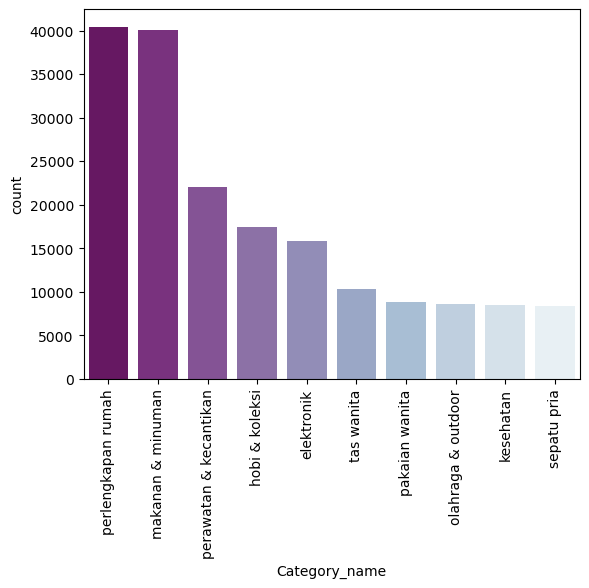

In [12]:
g = sns.barplot(data=bar, x="Category_name", y="count",palette="BuPu_r")
g.set_xticklabels(labels=label, rotation=90)
# plt.figure(figsize=(30, 15))
plt.show()

In [13]:
df_makanan = df.filter((df.Category_name == "makanan & minuman" )) 
df_makanan.show(2,vertical=True)

-RECORD 0----------------------------
 item_id      | 68258144680          
 name         | abon tongkol | ab... 
 cat_name     | makanan & minuman    
 sub_name     | makanan siap saji    
 sub_sub_name | makanan siap saji    
 sold         | 0                    
 hist_sold    | 10                   
-RECORD 1----------------------------
 item_id      | 3927936030           
 name         | ready stock! abon... 
 cat_name     | makanan & minuman    
 sub_name     | makanan siap saji    
 sub_sub_name | makanan siap saji    
 sold         | 130                  
 hist_sold    | 690                  
only showing top 2 rows



In [14]:
df3 = df_makanan.groupBy("sub_name")\
              .count()\
              .orderBy('count',ascending=False)
df3.show(150)

+--------------------+-----+
|            sub_name|count|
+--------------------+-----+
|      makanan ringan|10872|
|         bahan pokok| 7974|
|       makanan segar| 3954|
|      makanan instan| 3615|
|             minuman| 3132|
|makanan & minuman...| 2609|
|        makanan beku| 2600|
|   makanan siap saji| 1697|
|          roti & kue| 1375|
|    cokelat & permen|  885|
|        menu sarapan|  554|
|      makanan kaleng|  387|
|       susu & olahan|  324|
|      kecap & sambal|   33|
|      bumbu & rempah|   20|
|               garam|   16|
|       penyedap rasa|    6|
|             lainnya|    4|
|   bahan kue lainnya|    3|
|      tepung premiks|    2|
|                 nan|    2|
|             pemanis|    2|
|baking powder & soda|    1|
|              merica|    1|
|               kaldu|    1|
+--------------------+-----+



In [15]:
df_submakanan = df.filter((df.sub_name == "makanan ringan")) 
df_submakanan.show(30,vertical=True)

-RECORD 0----------------------------
 item_id      | 15799406280          
 name         | susu kacang kedele   
 cat_name     | makanan & minuman    
 sub_name     | makanan ringan       
 sub_sub_name | kacang               
 sold         | 0                    
 hist_sold    | 70                   
-RECORD 1----------------------------
 item_id      | 44328271320          
 name         | keripik pare         
 cat_name     | makanan & minuman    
 sub_name     | makanan ringan       
 sub_sub_name | makanan ringan la... 
 sold         | 170                  
 hist_sold    | 170                  
-RECORD 2----------------------------
 item_id      | 38044525730          
 name         | garuda kcg snack ... 
 cat_name     | makanan & minuman    
 sub_name     | makanan ringan       
 sub_sub_name | kacang               
 sold         | 0                    
 hist_sold    | 200                  
-RECORD 3----------------------------
 item_id      | 24035394780          
 name       

In [16]:
df4 = df_submakanan.groupBy("sub_sub_name")\
              .count()\
              .orderBy('count',ascending=False)
df4.show()

+--------------------+-----+
|        sub_sub_name|count|
+--------------------+-----+
|   keripik & kerupuk| 4411|
|biskuit & kue kering| 2180|
|              kacang| 2138|
|makanan ringan la...| 1074|
|makanan ringan ma...|  378|
|makanan ringan as...|  338|
|         biji-bijian|  206|
|         buah kering|  113|
|      makanan ringan|   34|
+--------------------+-----+



In [17]:
df_label = df.filter((df.sub_name == "kerajinan tangan")) 
df_label.show(5,vertical=True)

-RECORD 0----------------------------
 item_id      | 76270784310          
 name         | manbar - cangkang... 
 cat_name     | hobi & koleksi       
 sub_name     | kerajinan tangan     
 sub_sub_name | diy                  
 sold         | 20                   
 hist_sold    | 20                   
-RECORD 1----------------------------
 item_id      | 5918771200           
 name         | kode a13-30 ice c... 
 cat_name     | hobi & koleksi       
 sub_name     | kerajinan tangan     
 sub_sub_name | diy                  
 sold         | 0                    
 hist_sold    | 220                  
-RECORD 2----------------------------
 item_id      | 22866583110          
 name         | 6 pcs aplikasi ic... 
 cat_name     | hobi & koleksi       
 sub_name     | kerajinan tangan     
 sub_sub_name | diy                  
 sold         | 0                    
 hist_sold    | 90                   
-RECORD 3----------------------------
 item_id      | 18868576380          
 name       

In [18]:
# df_label.write.options(header='True', delimiter=',') \
#  .csv("E:/SKRIPSI/ShopeeLabel/26kerajinantangan.csv")

In [19]:
cek = df.filter((df.name).contains("karpet"))
cek.show(30,vertical=True)